# Deducing Plot in <i> The Great Gatsby </i> By Analyzing the Narrative Timeline of Colors

In [0]:
import numpy as np
import string
import matplotlib as plt
import matplotlib.patheffects as mpe
import matplotlib.pyplot as plt

In [0]:
filename = 'Gatsby.txt'
file = open(filename, encoding = "ISO-8859-1" )
text = file.read()
file.close()
# split into words by white space
words = text.split()
# remove punctuation from each word
punctuation = str.maketrans('', '', string.punctuation)
gatsby = [i.translate(punctuation) for i in words] #list of the words in the book

To decide what colors to use, I looked at the palette of <i> The Great Gatsby </i> and noticed that the major colors used in the Great Gatsby are White, Golden, Silver, Gray, Lavender, Pink, Red, Green, and Blue.
The traditional meanings assigned to these colors in the Great Gatsby are as follows:

White represents purity and high morals.

Golden represents wealth and sucess.

Silver represents material wealth, like jewels.

Gray represents the unininteresting, or the mundane.

Lavender represents the excess indulgences of the wealthy.

Pink represents romance, love, and passion.

Red represents shame and rage.

Green represents hope.

Blue represents the superficiality of wealth, as well as the depression associated with this facade.




In order to clarify and analyze usage of colors as it relates to plot, the following functions and lines of code will be used to plot different mentions of colors in the book throughout narrative time.

In [0]:
def splitIntoChapters(textList):
  """
  Parameters:
  textList (list): list of words representing a book
  
  Returns:
  A list of floats representing the positions of chapters, relative to the entire book length
  """
  
  bookLength = 0 #represents total number of words in book
  chapterLocations = [] #represents location of chapters in book
  chapterPos = [] #represents relative location of chapters in book
  for i in range(len(textList)):
    bookLength+=1
  for i in range(len(textList)):
    if textList[i] == "Chapter":
      chapterLocations.append(i/bookLength)
  chapterLocations.append(1) #add last point for the end of the book
  graphPoints = np.array_split(chapterLocations, len(chapterLocations)) #split array into number of chapters
  for i in graphPoints:
    chapterPos.append(i.item(0))
  return chapterPos

In [0]:
chapterPosition = splitIntoChapters(gatsby) #list of chapters locations relative to book length
chapterPositionWords = [i * len(gatsby) for i in chapterPosition] #list of chapter locations based on how
                                                                  #many words into the book each chapter starts at

In [0]:
def colorSum(textList):
  from collections import defaultdict
  colors1 = []
  """
  Parameters:
  textList (list): list of words representing a book
  
  Returns:
  A list representing the number of mentions of each color in a text
  """

  textList = [i.lower() for i in textList] #lowercase each word in book
  
  colors_dict = defaultdict(int) #initialize dictionary
  
  #list of colors to search for
  colors = ['white','gold','silver','grey','lavender','pink','red','green','blue']
  
  for i in textList:
    if i in colors:
      colors_dict[i] += 1 #create dictionary with colors and corresponding values
      
  for i in colors:
    colors1.append(colors_dict[i]) #make list with ints representing number of mentions of colors in textList
  return (colors1)


In [0]:
def countColorInChapters(textList, chapterWordLocation):
  """
  Parameters: 
  textList(list): list of words representing a book
  chapterWordLocation(list): list of ints representing at what word count the chapters in a book begin
  
  Returns:
  A list of lists of ints representing the number of mentions of colors in each chapter of the book
  
  """

  colorCount = []
  colorCount.append([0,0,0,0,0,0,0,0,0]) #accounts for the very start of the book
  for i in range(1,len(chapterWordLocation)):
    start = int(chapterWordLocation[i-1]) #word that represents start of the chapter
    end = int(chapterWordLocation[i]) #word that represents the end of the chapter
    colorCount.append(colorSum(textList[start:end])) #calculates the number of colors in the chapter
  return colorCount

In [0]:
colorCount = countColorInChapters(gatsby, chapterPositionWords)

In [0]:
def graphColorsNarrativeTime(colorCount,chapterPosition,bookTitle):
  """
  Parameters:
  colorCount (list of lists): list of lists of ints representing the number of mentions of colors in each chapter of the book
  chapterPosition(list): list of floats representing chapter location relative to book length
  bookTitle(string): string representing the title of the book
  
  Returns:
  A line plot that depicts the change in color throughout chapters and narrative time in the novel; the chapters are
  labeled in order from left to right
  """
  
  colors = ['White','Gold','Silver','Gray','Purple','Pink','Red','Green','Blue']
  xvalues = []
  yvalues = []
  x = []
  chapterList = []
  
  #set up plot, title, and axes labels
  fig = plt.figure(figsize=(15,8))
  ax1 = fig.add_subplot(111)
  ax1.set_xlim(left = 0,right = 1.3)
  ax1.set_xlabel('Relative position in book')
  ax1.set_ylabel('Frequency of color-related words')
  ax1.set_title('The Usage of Color Over Time in ' + bookTitle)
  
  #graphs approporiately colored points representing the usage of colors over time
  for i in range(len(chapterPosition)):
    for j in range(len(colorCount[0])):
      ax1.scatter(chapterPosition[i], colorCount[i][j], c = colors[j], edgecolor = 'black')
  for i in chapterPosition:
      xvalues.append(i)
      
  #plots a scatter plot line connecting the points with the appropriate colored lines
  for j in range(len(colorCount[0])):
    x= []
    yvalues.append(x)
    for i in range(len(colorCount)):
      x.append(colorCount[i][j])
  #path effects ensure that there is a border around each line so the white line will not look invisible
  pe = [mpe.Stroke(linewidth=2, foreground='black'),
        mpe.Stroke(foreground='black',alpha=1),
        mpe.Normal()]
  for i in range(len(colorCount[0])):
    ax1.plot(xvalues, yvalues[i], label='{}'.format(colors[i]), marker='o', color = colors[i], path_effects = pe)
    
  #adds values to chapterList to signify the positions of chapter in narrative time 
  for i in range(len(chapterPosition)):
    if (i == 0):
      chapterList.append('start')
    elif (i == len(chapterPosition)-1):
      chapterList.append('End of Chapter' + str(i))
    else:
      chapterList.append("Chapter " + str(i))
  #plots the chapters as vertical lines
  list3 = []
  list4 = []
  for i in range(len(chapterPosition)):
    plt.axvline(x = chapterPosition[i],color = 'black', linestyle = ":")
    list3.append(chapterPosition[i])
    list4.append(chapterList[i])
  plt.xticks(list3,list4) #labels chapters
  ax1.legend()
  return ax1

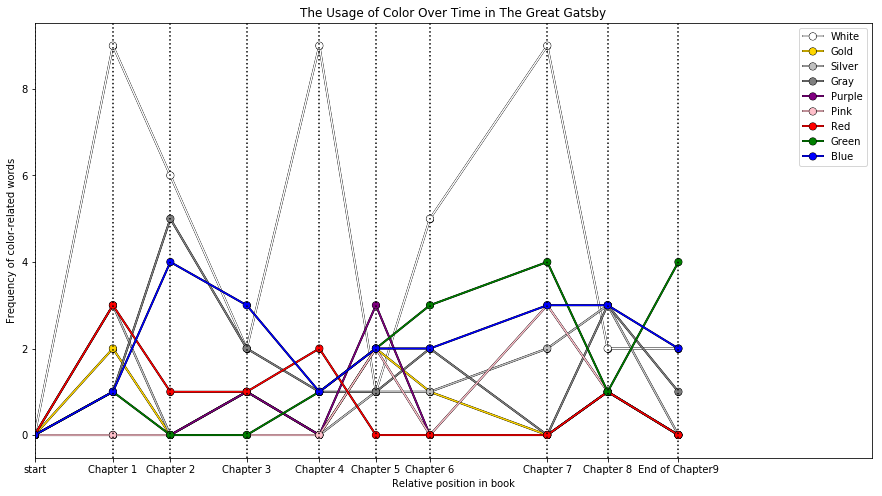

In [0]:
graphColorsNarrativeTime(colorCount,chapterPosition, 'The Great Gatsby')

## Analysis of Graph

The graph above is very interesting because it emphasizes the fluctuations of color throughout <i> The Great Gatsby</i>. Notice how not all color lines are shown in each section of the graph because sometimes, in the same chapter, the same color word is used with the same frequency as another, so several lines are on top of each other. This does not present a problem, however, because we will be primarily focusing on the colors with large fluctuations between chapters to help deduce the plot.

For this analysis, let's simultaneously consider a brief summary of eaach chapter, and, recalling the meanings associated with color as described earlier, note how this is perhaps reflected in fluctuations of colors.

<b> Chapter 1 </b>
In Chapter 1, readers are introduced to Nick Carraway, the narrator of the story. The drastic increase in white is notable here, as Nick describes his high morals. Nick meets up with his cousin, Daisy Buchanan, and her husband Tom, for dinner. He is also introduced to Daisy's friend, Jordan. The lack of a pink color here is interesting, as Tom is cheating on Daisy, and there does not seem to be a big connection betwee Nick and Jordan - thus the lack of pink could represent the lack of passion between the individuals at the dinner. In addition, the large increase in red could signify the hidden shame and rage that is present in the room - Tom may feel guilty for cheating on his wife, and his wife ,may feel a deep, inner rage, toward her husband because he is cheating on her. The last notable color fluctuation here seems to be the slight increase in green, simply because it is not used much in the beginning of the book, but rather comes into play later, when Gatsby enters the scene. However, as Nick sees Gatsby for the time, Gatsby is looking out into the water, gazing at a green light. This green light may represent the hope that Nick feels upon seeing Gatsby - he is a new person in Nick's life and perhaps may teach Nick some valuable lessons. 

<b> Chapter 2</b> The major color fluctuations in this chapters are the increases in the colors blue and gray. Tom and Nick take the train into the city, and Nick notes the grayness of the city, including a billboard for an optometrist. This sense of dull lifenesses likely contributes to the large increase of gray in this chapter, as gray is indicative of the mundane qualities of life. Tom and Nick meet Myrtle, Tom's mistress, and they head back to the apartment that Tom has for Myrtle. Tom hosts a party with friends at the apartment but it ends badly, as Myrtle and Tom argue about Daisy and Tom ultimately breaks Myrtles's nose. The increase in blue in this chapter is significant, because it emphasizes the depression and the loss of hope associated with using money to act as a shield from the world. Tom tries to use his money to enjoy life, but perhaps deep down he realizes the essential issues with his life, such as the immorality associated with cheating on his wife, and it is hard for him to ignore this, even by using his wealth as a shield from these problems. Again, note the total lack of pink in this chapter, as there is no true romantic passion between lovers in this chapter.

<b> Chapter 3 </b>

The color analysis for this chapter is very interesting, as during this chapter Nick describes Gatsby's luxurious parties, and attends one himself. The luxury of these parties may contribute to the increase of yellow, as he is reminded of the wonders associated with wealth and success. Also note the drastic decrease of gray, as this chapter does not reflect the dull qualities of life, but rather emphasizes the wonders and luxuries associated with wealthy nightlife. At the party, Nick meets Gatsby and also runs into Jordan. The large decrease in the usage of white in this chapter is most like reflective of the fact that Nick discovers a personality trait of Jordan: she is dishonest. Nick finds out that Jordan cheats in golf and is generally not truthful; the decrease in the color white, which represents high morals and purity, likely reflects this notion of Jordan's dishonesty.

<b> Chapter 4 </b> In Chapter 4, Nick learns more about Gatsby, and also meets his shady friend, Meyer Wolfshiem, who is involved in organized crime and illegal betting. Thus, it is interesting to see such an increase in the usage of the color white in this chapter. Perhaps this increase can be attributed to Gatsby's life story. Nick believes that Gatsby is lying to him, but in fact some of his tales later turn out to be accurate, reflecting truth and thus meriting an increase in the color white. In addition, Nick learns that Daisy had originally planned to marry Gatsby, but, after he went overseas for the war, Tom pursued her and she ultimately married him, an action which, to some extent, she regrets. Gatsby still secretely hopes to win Daisy back, which is why his house his so close to Daisy's; he throws such fancy parties in hopes that Daisy will attend. Thus, the increase in red in this chapter likely reflects the inner anger and regret that both Daisy and Gatsby feel. There is currently no passion between them, and thus the pink color remains low.

<b> Chapter 5 </b> Chapter 5 is a unique chapter thus far, as things seem to turn out relatively well. Gatsby, although initially nervous, ends up meeting with Daisy by himself, and the two get along very well. Daisy appreciates Gatsby's material wealth. Note the large changes in color here - pink, green, lavender, and yellow all increase significantly, while red decreases. Pink experiences a large increase because there is a reuinted love, a strong passion, between Gatsby and his former lover, Daisy. Green sees a spike because Gatsby has a newfound hope - perhaps he and Daisy may work out after all. Lavender also sees a large increase, as Gatsby flaunts his wealth to Daisy. Seeing that lavender is reflective of material indulgence, which Gatsby is no stranger to, the increase in lavender represents Gatsby's many material possesions. Yellow also increases because Gatsby appears to be satisfied with his wealth and success, as it seems like it may draw Daisy back to him. Red decreases because the shame and anger built up deep in Gatsby and Daisy perhaps recede in this chapter, as the two happily reunite. However, one cannot ignore the large drop in white in this chapter - perhaps it signifies the lack of morals that Gatsby has had to exercise in order to become so wealthy. It could also signify that Daisy feels impure - rather than waiting for Gatsby to return from overseas she was tempted by Tom and now perhaps feels guilty.

<b> Chapter 6 </b> In Chapter 6, Nick reveals some of Gatsby's true background, and readers begin to realize that <i> parts </i> of Gatsby's tales were a lie. Thus, there is an increase in white, as the truth is revealed. Gatsby did not start as a wealthy individual, he is part of the "new rich", rather than the "old rich", and thus the decrease of lavender in this chapter may represent Gatsby's initial lack of material wealth. In addition, Tom, acting as the epitome of a hypocrite, visits Gatsby, as he is suspicious that Daisy visits Gatsby's house alone. However, Tom does not yet know that Daisy and Gatsby love each other. Tom thinks that Gatsby lacks proper social skills. Thus, perhaps the decrease in yellow symolizes Gatsby's seeming lack of success, in Tom's eyes. In addition, the decrease in pink resembles the lack of passion that Tom and Gatsby feel for each other, and perhaps foreshadows animosity between the two.

<b> Chapter 7 </b> In Chapter 7, the primary color fluctuations occur with pink and white. There is a great increase in passion, as Tom realizes that Gatsby and Daisy love each other and Myrtle's husband, Wilson, also discovers Myrtle's infidentlity. There is great tension, as Gatsby and Tom confront each other in a New York City hotel, but Daisy ultimately ends up choosing Tom over Gatsby.  Daisy and Gatsby end up driving back from New York City together in Tom's car, and Daisy hits Myrtle with the car, killing her. Gatsby, however, says that he will take the blame for Daisy. Thus, it is interesting that white increases in this chapter, as there are many decietful and immoral events occuring, but perhaps this is due to the purity that results as the cheating going on among couples has finally been brought out into the open. The elephant in the room has revealed itself.

<b> Chapter 8 </b> In this Chapter, Gatsby reveals that he lied to Daisy about his wealthy background upon meeting her, in order to woo her. Thus, white drops, as Gatsby reveals his tendency to lie. In addition, Wilson vows to get revenge on the individual who killed Myrtle, so he, believing it was Gatsby, kills Gatsby as he lounges in the pool, before killing himself. Thus, pink plummets, as there can no longer be any chance of passion between Gatsby and Daisy. Also, the use of green decreases as Gatsby's hopes of finding love are destroyed the moment he is killed. Red increases slighly too, perhaps representing the extreme rage of Wilson.

<b> Chapter 9 </b> In the last chapter of the book, Nick arranges a funeral for Gatsby, which almost nobody, with the exception of some servants and Gatsby's father, attends. Nick decides to move back to the Midwest, and runs into Tom one last time, who explains that he thought Gatsby deserved to die, and thus told Wilson that the car used to kill Myrtle belonged to Gatsby. Almost all of the colors in this chapter, with the exception of green, plummet. Silver, which has not played a big role thus far, drops, representing the lack of material wealth that Gatsby now owns, as he is dead. Similarly, yellow decreases, as Gatsby can no longer enjoy the benefits of his wealth. Blue also decreases, as readers understand that it is not healthy, and arguably not possible, to live ones life behind a shield of wealth. Interestingly, the only color that increases in this chapter is green, which perhaps represents the hope that Nick has for his future in the Midwest.